In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Importing necessary libraries for data manipulation, visualization, and machine learning.
# - numpy: For numerical computations.
# - pandas: For data manipulation and analysis.
# - os: For interacting with the operating system.
# - matplotlib.pyplot: For static data visualization.
# - plotly.express and plotly.graph_objects: For interactive data visualization.
# - seaborn: For statistical data visualization.
# - sklearn.ensemble.RandomForestClassifier: For building a random forest classifier model.
# - sklearn.model_selection.train_test_split: For splitting the dataset into training and testing sets.
# - sklearn.metrics.accuracy_score: For evaluating the performance of the model.
# - sklearn.preprocessing.LabelEncoder: For encoding categorical labels into numerical format.


In [5]:
netflix_data = pd.read_csv('/content/netflix_titles.csv')
# Loading the Netflix dataset into a pandas DataFrame.
# - The dataset is expected to be a CSV file located at '/content/netflix_titles.csv'.
# - The resulting DataFrame, netflix_data, will allow for further exploration and analysis of the data.


In [6]:
netflix_data.head(3)
# Displaying the first three rows of the Netflix dataset.
# - This helps to quickly inspect the structure, column names, and sample data within the dataset.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [7]:
netflix_data.shape
# Checking the shape of the Netflix dataset.
# - This returns a tuple (number_of_rows, number_of_columns) representing the dataset's dimensions.
# - Useful for understanding the dataset size.


(8807, 12)

In [9]:
print(netflix_data.info(), "\n")
print(netflix_data.isnull().sum())
# Displaying information about the Netflix dataset and checking for missing values.

# netflix_data.info():
# - Provides an overview of the dataset, including the number of non-null entries in each column,
#   data types of columns, and memory usage.
# - Helps to understand the dataset's structure and identify columns that may require data cleaning or preprocessing.

# netflix_data.isnull().sum():
# - Calculates the number of missing values in each column.
# - Allows identification of columns with missing data to address them appropriately during data cleaning.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description   

In [10]:
netflix_data.count()
# Counting the number of non-null values in each column of the Netflix dataset.
# - This gives an idea of the completeness of the data in each column.
# - Useful for comparing with the total number of rows to identify missing data.


,0
show_id,8807
type,8807
title,8807
director,6173
cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804


In [11]:
netflix_data.describe()
# Generating descriptive statistics for the Netflix dataset.
# - This provides summary metrics such as count, mean, standard deviation, min, max, and quartiles for numerical columns.
# - Useful for understanding the distribution and central tendencies of the dataset.
# - Note: Only numerical columns are considered in the default output.


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
netflix_data['type'].unique()
# Displaying the unique values in the 'type' column of the Netflix dataset.
# - This provides information about the distinct categories or types available in this column.
# - Useful for understanding the categorical diversity, such as 'Movie' or 'TV Show'.


array(['Movie', 'TV Show'], dtype=object)

In [13]:
null_counts = netflix_data.isnull().sum()
total_rows = len(netflix_data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)
# Calculating the percentage of missing values for each column in the Netflix dataset.

# Steps:
# 1. `netflix_data.isnull().sum()`: Counts the number of missing values in each column.
# 2. Calculate the percentage of missing values by dividing the null counts by the total number of rows (`total_rows`).
# 3. Create a new DataFrame (`null_percentage_df`) with columns 'Column Name' and 'Null Percentage' for better representation.
# 4. Sort the DataFrame in descending order by 'Null Percentage' to prioritize columns with the most missing data.
# 5. Reset the index for a cleaner presentation.

# Purpose:
# - Provides insights into the extent of missing data in each column.
# - Helps decide on strategies for handling missing data (e.g., dropping columns, imputing values).


     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


In [14]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    netflix_data[column].fillna("Unknown", inplace=True)
# Imputing missing values in selected columns of the Netflix dataset.

# Steps:
# 1. Define a list of columns (`columns_to_impute`) that require handling of missing values.
#    - Selected columns: ['director', 'country', 'cast', 'rating', 'duration'].
#    - These columns likely contain categorical or textual data.
# 2. Use `fillna("Unknown", inplace=True)` to replace all missing values with the string "Unknown".
#    - This prevents data loss by retaining rows while marking missing values explicitly.

# Purpose:
# - Ensures that missing values in critical columns are handled consistently.
# - Allows analysis to proceed without encountering errors due to missing data.


<ipython-input-14-0ae232082199>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data[column].fillna("Unknown", inplace=True)


In [15]:
netflix_data
# Previewing the Netflix dataset.
# - In an interactive environment, printing the entire DataFrame
#   will typically show a truncated version if it's large.
# - This can help verify that missing values have been successfully imputed.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [16]:
netflix_data.columns
# Listing all column names of the Netflix dataset.
# - This allows to see the available columns after any data cleaning or manipulation steps.
# - Helpful for referencing columns in subsequent operations.


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
netflix_data.description[1]
# Retrieving the value in the 'description' column for the row with index 1.
# - This provides the description text of the second entry in the Netflix dataset.


'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [18]:
netflix_data.type
# Accessing the 'type' column of the Netflix dataset as a pandas Series.
# - This Series contains the type information for each entry, such as 'Movie' or 'TV Show'.


,type
0,Movie
1,TV Show
2,TV Show
3,TV Show
4,TV Show
...,...
8802,Movie
8803,TV Show
8804,Movie
8805,Movie


In [19]:
tv_show = netflix_data[netflix_data['type']== 'TV Show']
movie = netflix_data[netflix_data['type']== 'Movie']
# Splitting the dataset into two separate DataFrames based on the 'type' column.
# - 'tv_show' contains rows where the 'type' is 'TV Show'.
# - 'movie' contains rows where the 'type' is 'Movie'.
# This separation allows for focused analysis on each type individually.


In [20]:
display(movie.head(4), '_')
display(tv_show.head(4))
# Displaying the first four rows of the 'movie' DataFrame and the first four rows of the 'tv_show' DataFrame.
# - The 'display' function is used (commonly in Jupyter notebooks) to nicely format the DataFrame outputs.
# - The underscore ('_') in the display function separates the two outputs for better clarity when viewing.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


'_'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
movies_df = netflix_data[netflix_data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie
# Extracting the oldest movie from the Netflix dataset.
# 1. Create a DataFrame, 'movies_df', that only contains rows where 'type' is 'Movie'.
# 2. Identify the minimum release year in 'movies_df'.
# 3. Filter 'movies_df' to retrieve the row(s) corresponding to this minimum release year.
#    - This yields the oldest movie(s) in the dataset (based on the 'release_year' column).


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [22]:
len(netflix_data['listed_in'].unique())
# Calculating the number of unique categories in the 'listed_in' column.
# - The 'listed_in' column typically lists one or more genres or categories.
# - Using .unique() returns all distinct values in the column, and len() counts them.


514

In [23]:
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)
# Identifying and counting the popularity of individual genres in the 'listed_in' column.
# 1. Split the genre strings in the 'listed_in' column by ', ' to separate multiple genres.
# 2. Use 'explode()' to transform each list of genres into individual rows.
# 3. Apply 'value_counts()' to count the occurrence of each distinct genre.
# 4. Extract the top 5 most frequent genres with 'head(5)'.
# 5. Print the result to see the most popular genres in the dataset.


Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


In [24]:
comedian_movies = netflix_data[netflix_data['listed_in'] == 'Comedies']
# Creating a new DataFrame 'comedian_movies' by filtering the Netflix dataset to include only rows
# where the 'listed_in' column exactly matches 'Comedies'.
# - This filter is case-sensitive and requires an exact match to 'Comedies'.
# - Note that if a movie or show has multiple listed categories (e.g., 'Comedies, Dramas'),
#   it will not appear in this filtered DataFrame.


In [26]:
comedian_movies.head(3)
# Displaying the first three rows of the 'comedian_movies' DataFrame.
# - This helps to verify that the filtering was successful and inspect the records classified as 'Comedies'.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...


In [27]:
cast_counts = netflix_data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)
# Identifying and counting the frequency of individual cast members in the 'cast' column.
# 1. Split the strings in the 'cast' column by ', ' to separate multiple cast members.
# 2. Use 'explode()' to transform each list of cast members into individual rows.
# 3. Apply 'value_counts()' to count how often each cast member appears.
# 4. Extract the top 5 most frequently appearing cast members with '.head(5)'.
# 5. Print the result to see which cast members appear most often in the dataset.


Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


In [28]:
recent_movie_data = netflix_data[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)
# Extracting information from the Netflix dataset about a specific recent movie (or show).
# 1. Select the 'title', 'type', and 'description' columns using double brackets `[[]]`.
# 2. Use `.iloc[0]` to retrieve the first row of the filtered DataFrame, returning a Series.
# 3. Set `pd.set_option('display.max_colwidth', None)` to ensure the entire 'description' is visible.
# 4. Print 'recent_movie_data' to display the selected information without truncation.


title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


In [29]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()
# Creating a Pie chart to visualize the distribution of data types within the 'netflix_data' DataFrame:
# 1. Convert the dtype objects to string, then count how many columns belong to each data type.
# 2. Construct a Pie chart using Plotly, with 'labels' as the unique data types and 'values' as their counts.
# 3. Update the layout to include a title and display the figure.

In [30]:
fig = px.histogram(netflix_data,x="release_year", title="release_year", color="release_year")
fig.update_layout(
    bargap=0.2
)
fig.show()
# Creating a histogram to visualize the distribution of 'release_year' in the Netflix dataset:
# 1. 'x="release_year"' determines that the release year is plotted on the x-axis.
# 2. 'color="release_year"' assigns a color to each bar based on its release year, offering a quick visual distinction.
# 3. 'bargap=0.2' adjusts the spacing between the bars in the histogram.
# 4. 'fig.show()' renders the interactive plot.

In [31]:
ax = px.histogram(netflix_data,x="country",marginal="box",title="country")
ax.update_layout(bargap=0.2)
# Creating a histogram for the 'country' column in the Netflix dataset with an added box plot:
# 1. 'x="country"' plots the distribution of countries on the x-axis.
# 2. 'marginal="box"' adds a box plot above the histogram, showing the spread of values.
# 3. 'title="country"' sets the title of the figure.
# 4. 'ax.update_layout(bargap=0.2)' adjusts the spacing between histogram bars.

************************************************
 listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64 
************************************************


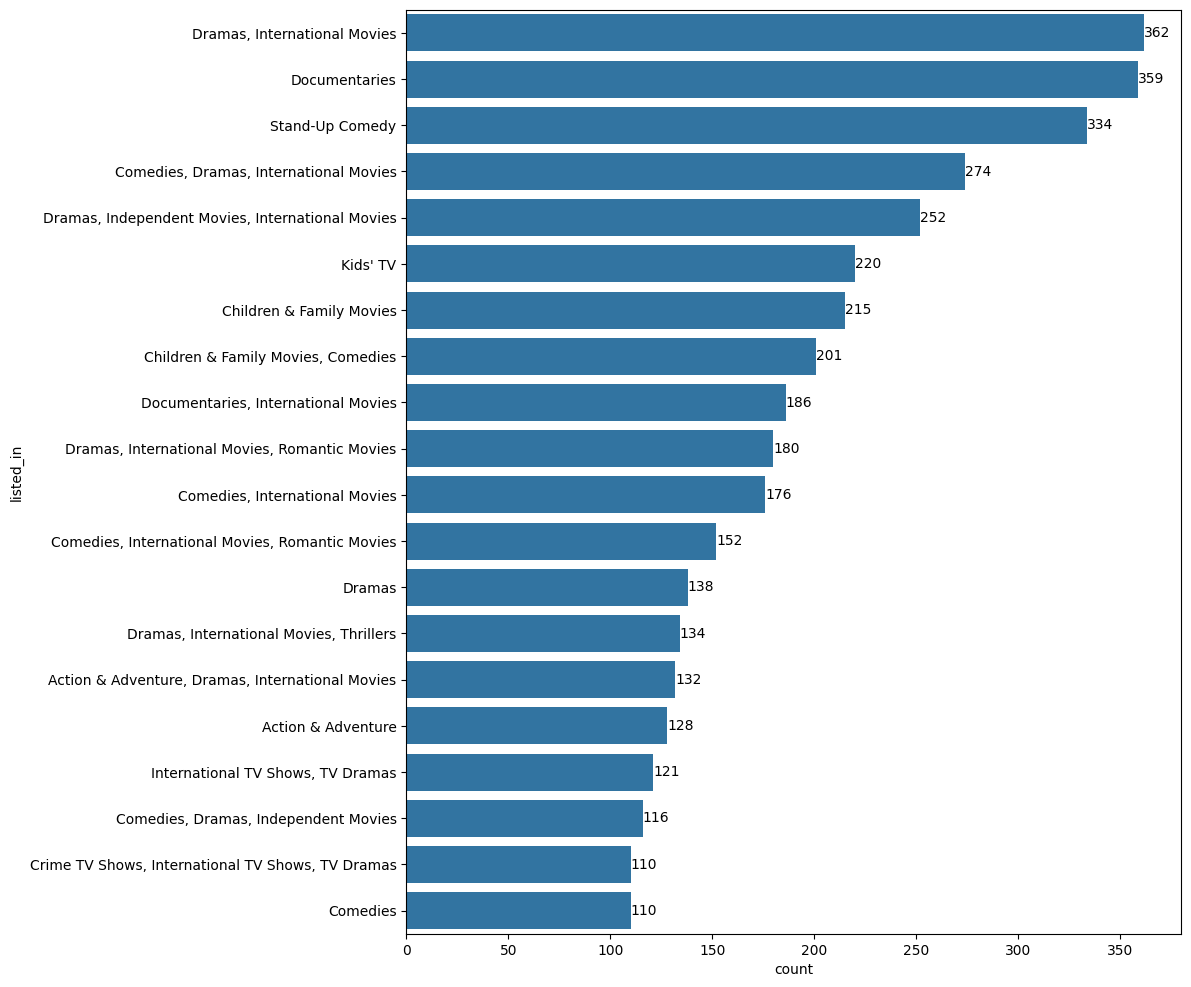

In [32]:
len(netflix_data['listed_in'].unique())
print('************************************************\n',netflix_data['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=netflix_data, y="listed_in", order=netflix_data['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()
# Analyzing the distribution of the 'listed_in' column in the Netflix dataset.

# 1. Count the number of unique categories in the 'listed_in' column with len(netflix_data['listed_in'].unique()).
# 2. Print a separator, followed by a series of the value counts for each distinct entry in 'listed_in'.
# 3. Create a figure with size 10 by 12 inches.
# 4. Use Seaborn's countplot to visualize the top 20 most frequent categories in 'listed_in'.
#    - 'y="listed_in"' plots the categories along the y-axis.
#    - 'order=netflix_data['listed_in'].value_counts().index[0:20]' ensures the categories are displayed in
#      descending order of frequency, and we only take the first 20.
# 5. Use 'ax.bar_label(ax.containers[0])' to display the count labels on each bar.
# 6. Show the plot with plt.show().

In [33]:
int_col = netflix_data.select_dtypes(include=('int')).columns
str_col = netflix_data.select_dtypes(include=('object')).columns
flt_col = netflix_data.select_dtypes(include=('float')).columns
# Separating column names by their data types in the Netflix dataset.
# 1. int_col: Holds the names of all integer-type columns (dtype 'int').
# 2. str_col: Holds the names of all object-type (string) columns (dtype 'object').
# 3. flt_col: Holds the names of all float-type columns (dtype 'float').

Index(['release_year'], dtype='object')
['release_year']


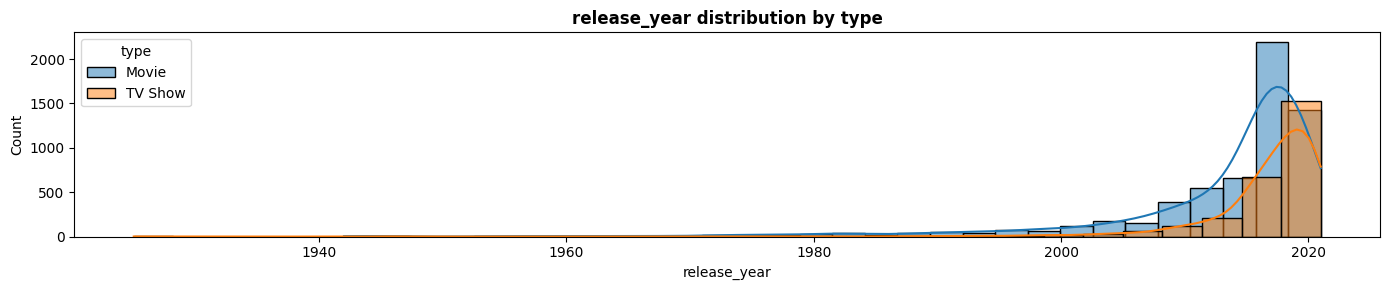

In [34]:
print(int_col)
int_col_without_id = [col for col in int_col if col != 'id']
print(int_col_without_id)
unique_outcomes = netflix_data['type'].unique()

plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i, col in enumerate(int_col_without_id):
    plt.subplot(len(int_col_without_id), 1, i+1)

    for outcome in unique_outcomes:

        sns.histplot(data=netflix_data[netflix_data['type'] == outcome], x=col, bins=30, kde=True, label=outcome)

    plt.title(f"{col} distribution by type", fontweight="bold")
    plt.xlabel(col)
    plt.legend(title='type')

plt.tight_layout()
plt.show()

# This code analyzes the distribution of integer-type columns in the Netflix dataset,
# separated by 'type' (e.g., 'Movie' or 'TV Show').

# 1. Print all integer columns, then create a new list excluding the 'id' column.
# 2. Identify the unique values in the 'type' column.
# These values are used to group the data when plotting.
# 3. Initialize a figure with subplots for each integer column (excluding 'id').
# 4. For each integer column, create a subplot showing histograms
# of its distribution split by each unique value in the 'type' column.
# Customize subplot titles and labels.
# 5. Adjust the layout to avoid overlapping elements and display the plots.

In [35]:
fig = px.histogram(netflix_data,x="rating", title="Rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()

# Creating a histogram to visualize the distribution of the 'rating' column in the Netflix dataset:
# 1. Specify 'x="rating"' to place ratings on the x-axis.
# 2. Color the bars by the 'rating' category to visually distinguish between different rating levels.
# 3. 'bargap=0.2' sets the spacing between bars in the histogram.
# 4. 'fig.show()' displays the interactive plot.

In [36]:
len(netflix_data.duration.unique())
# Counting the number of unique values in the 'duration' column.
# - This shows how many distinct durations exist in the dataset, including possible text-based entries (e.g., "90 min").
# - The result can be used to gauge the variety of durations in the Netflix dataset.

221

In [37]:
le = LabelEncoder()
for col in str_col:
    netflix_data[col] = le.fit_transform(netflix_data[col].astype('str'))
# Encoding string columns in the Netflix dataset using LabelEncoder.
# 1. Create an instance of LabelEncoder, stored in 'le'.
# 2. Iterate over each column name in 'str_col' (a list of columns with string/object data type).
# 3. Convert the column to string type (as a safeguard), then apply 'le.fit_transform' to encode
#    categorical values into numerical labels.
# 4. Assign the transformed values back into the original DataFrame column, effectively replacing
#    the string categories with numeric encodings.

In [38]:
netflix_data
# Previewing the transformed Netflix dataset after applying Label Encoding
# to string columns. All string-based categorical values have been converted
# into numeric labels, enabling more convenient feature modeling and analysis.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,1,3861,4303,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,2007,8,70,269,895
8803,8672,1,8773,4303,7246,736,788,2018,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,2006,6,206,125,3315


In [39]:
x = netflix_data.drop(['type'], axis='columns')
y = netflix_data[['type']]
# Splitting the dataset into features (X) and target (y).
# - 'x' is created by dropping the 'type' column from the dataset, leaving only the feature columns.
# - 'y' contains only the 'type' column, representing the variable we want to predict.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Split the dataset into training and testing sets with 80% training data and 20% testing data

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")
# Train a RandomForestClassifier on the training data, make predictions on the test data, and evaluate the model's accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy of the RandomForestClassifier on the test set: 0.9943246311010215


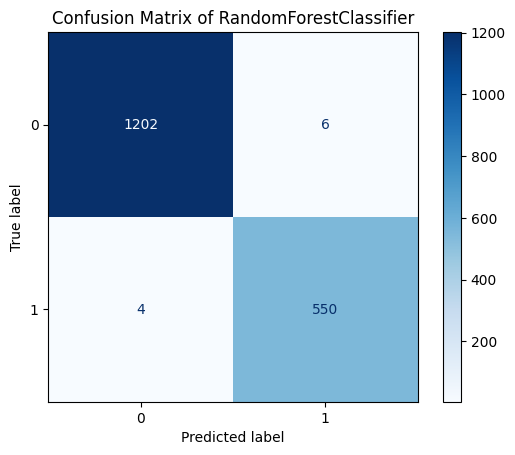

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Customize the visualization
plt.title("Confusion Matrix of RandomForestClassifier")
plt.show()
